# **Customer Segmentation Analysis for Credit Card Users: Enhancing Marketing Strategies through Behavioral Insights**

## **Project Overview**

## **Business Understanding**

In the highly competitive financial services sector, particularly in credit card services, understanding customer behavior is crucial for developing targeted marketing strategies. With a diverse customer base, it's essential for financial institutions to segment their customers effectively to cater to their specific needs, enhance customer satisfaction, and optimize marketing efforts. This project focuses on developing a customer segmentation model for a bank based on the usage behavior of credit card holders. The insights derived from this model will help in tailoring marketing strategies, improving customer retention, and identifying potential areas for product development.

## **Problem Statement**

The objective of this project is to create a customer segmentation model based on the behavioral data of approximately 9,000 active credit card holders over the past six months. By analyzing various behavioral metrics, we aim to identify distinct customer segments that exhibit similar usage patterns. These segments will be used to design personalized marketing campaigns and strategies to enhance customer engagement and profitability.

Key questions to address include:

- What are the main behavioral patterns among credit card holders?

- How can these patterns be grouped into distinct customer segments?

- What characteristics define each segment?

- How can these segments be leveraged to improve marketing strategies?

## **Data Understanding**

The dataset comprises 18 behavioral variables collected at the customer level, providing a comprehensive view of credit card usage over the last six months. Below is a summary of the key variables in the dataset:

1. CUST_ID: Unique identifier for each credit card holder (Categorical).

2. BALANCE: Remaining balance amount in the account.

3. BALANCE_FREQUENCY: Frequency of balance updates, scored between 0 and 1 (1 = frequently updated).

4. PURCHASES: Total amount of purchases made from the account.

5. ONEOFF_PURCHASES: Maximum amount of a single purchase transaction.

6. INSTALLMENTS_PURCHASES: Total amount of purchases made in installments.

7. CASH_ADVANCE: Total cash advance amount taken by the user.

8. PURCHASES_FREQUENCY: Frequency of purchases, scored between 0 and 1 (1 = frequently purchased).

9. ONEOFFPURCHASESFREQUENCY: Frequency of one-off purchases, scored between 0 and 1 (1 = frequently purchased).

10. PURCHASESINSTALLMENTSFREQUENCY: Frequency of installment purchases, scored between 0 and 1 (1 = frequently done).

11. Frequency of cash advances, scored between 0 and 1 (1 = frequently done).

12. CASHADVANCETRX: Number of transactions made with cash advances.

13. PURCHASES_TRX: Number of purchase transactions made.

14. CREDIT_LIMIT: Credit limit assigned to the user.

15. PAYMENTS: Total amount of payments made by the user.

16. MINIMUM_PAYMENTS: Minimum payments made by the user.

17. PRCFULLPAYMENT: Percentage of full payment made by the user.

18. TENURE: Duration of credit card usage by the user.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
credictcardData = pd.read_csv("data/CC GENERAL.csv")
credictcardData.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
credictcardData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
credictcardData.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
# Fill missing values in MINIMUM_PAYMENTS and CREDIT_LIMIT with the mean of the column
credictcardData['MINIMUM_PAYMENTS'] = credictcardData['MINIMUM_PAYMENTS'].fillna(credictcardData['MINIMUM_PAYMENTS'].mean())
credictcardData['CREDIT_LIMIT'] = credictcardData['CREDIT_LIMIT'].fillna(credictcardData['CREDIT_LIMIT'].mean())
credictcardData.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [6]:
# Check for and count duplicate rows
num_duplicates = credictcardData.duplicated().sum()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")

# Display duplicate rows if there are any
if num_duplicates > 0:
    print("Duplicate rows:")
    print(credictcardData[credictcardData.duplicated()])

Number of duplicate rows: 0


In [7]:
# # drop Customer ID since it has no meaning here 
# credictcardData.drop("CUST_ID", axis = 1, inplace= True)
# credictcardData.head()

In [8]:
credictcardData.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## **EDA**

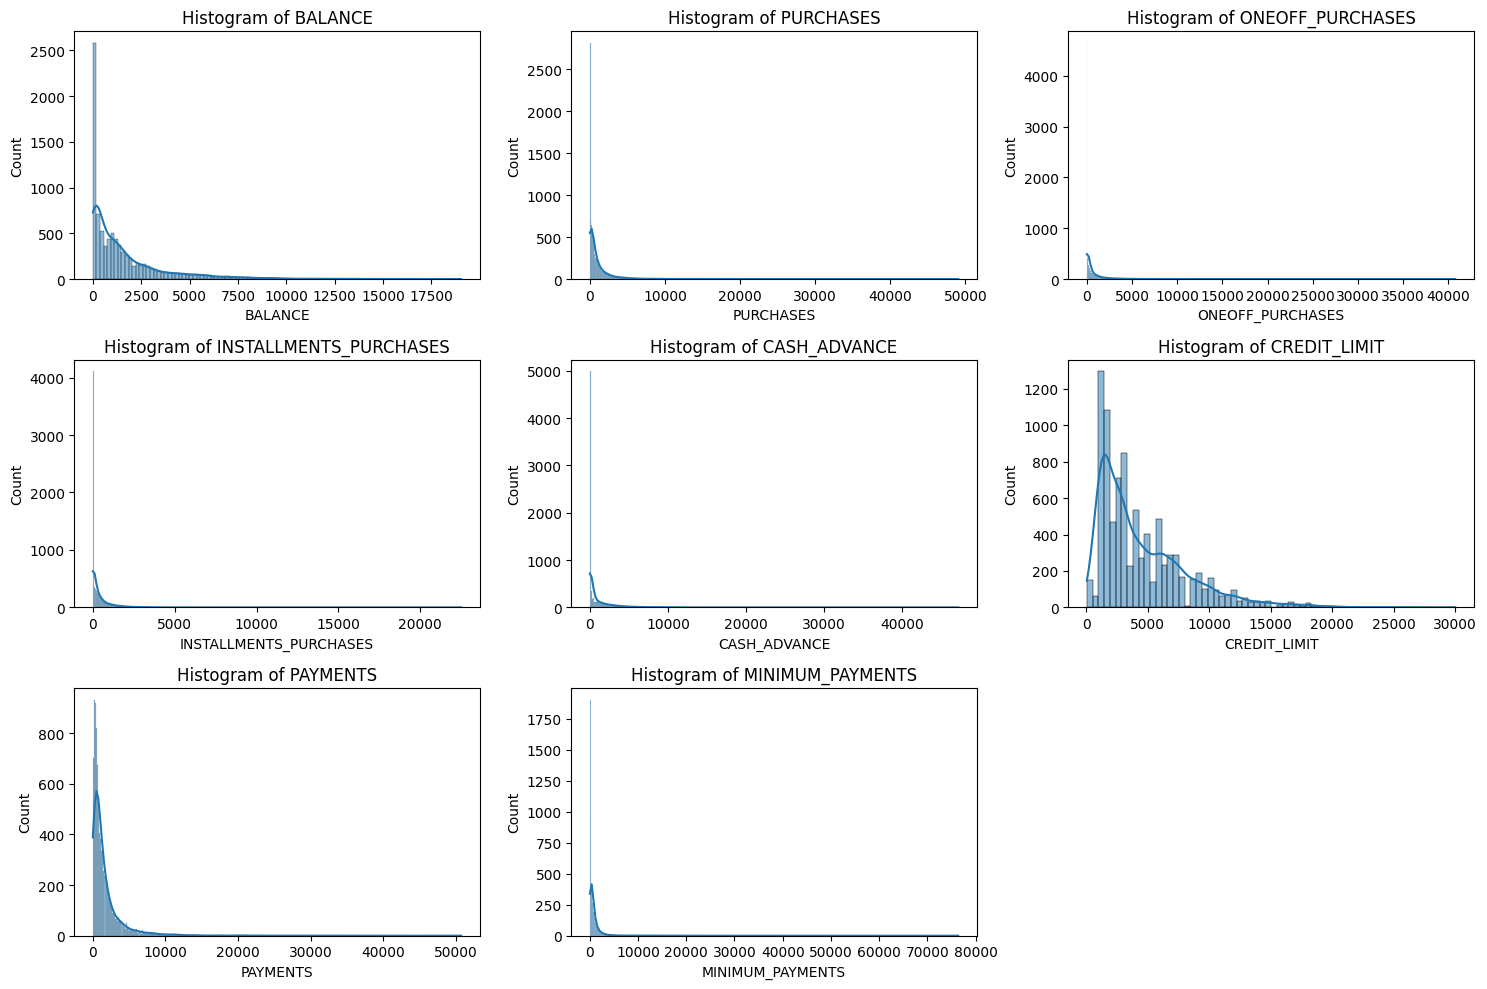

In [9]:
# Univariate Analysis (Numerical Variables - Histograms and Box Plots)
numerical_vars = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                  'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(credictcardData[var], kde=True)
    plt.title(f'Histogram of {var}')
plt.tight_layout()
plt.show()

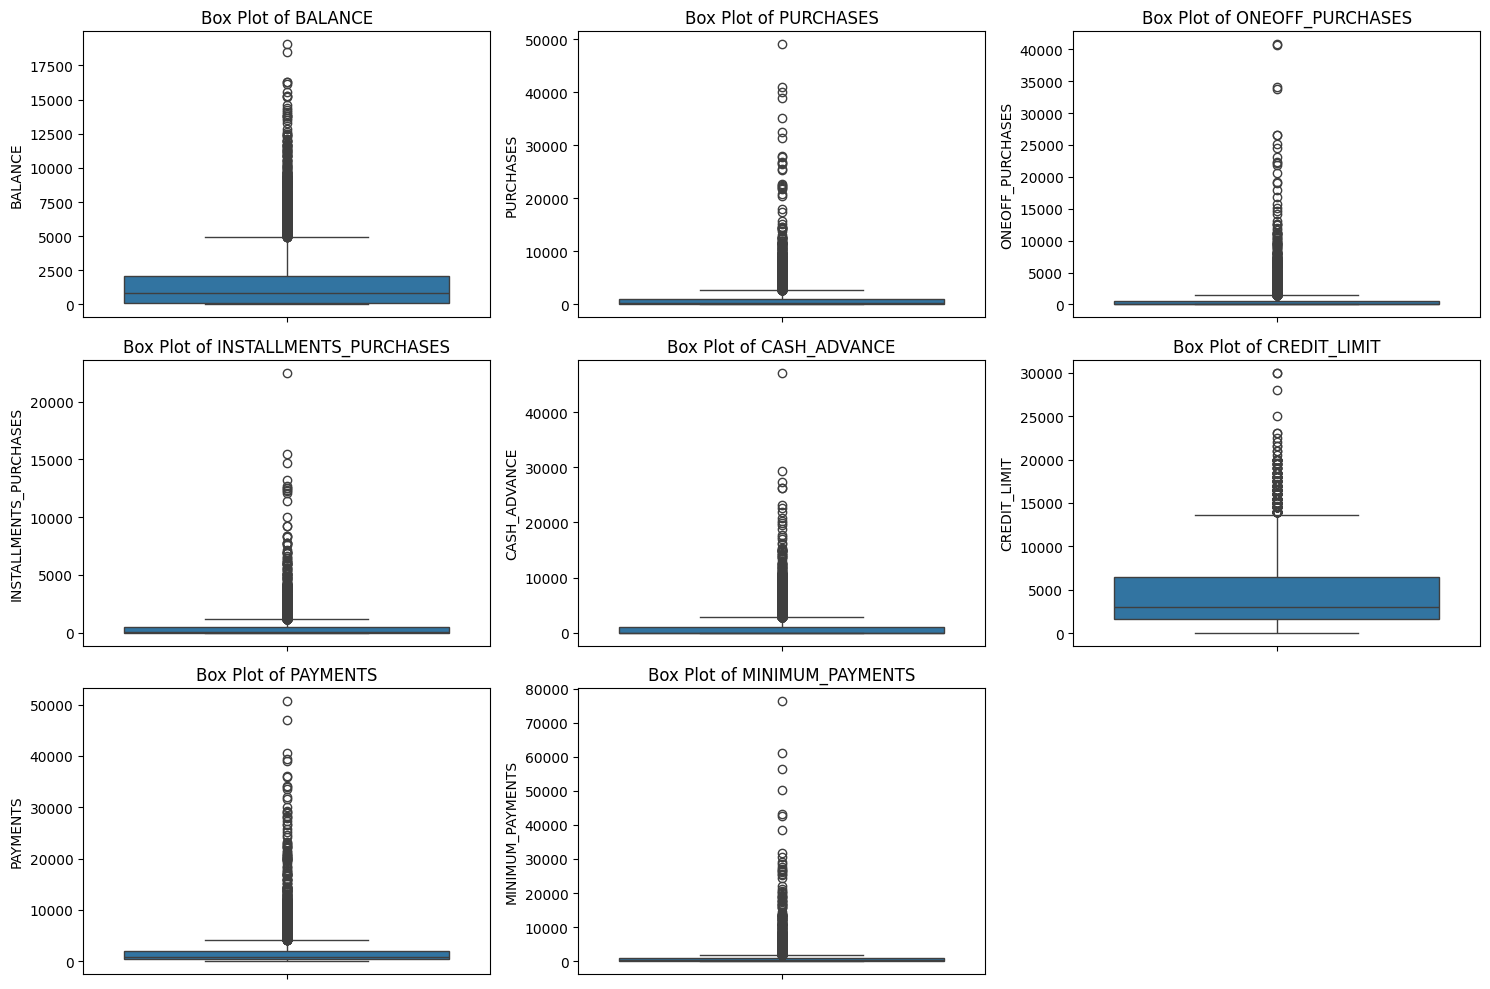

In [10]:
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=credictcardData[var])
    plt.title(f'Box Plot of {var}')
plt.tight_layout()
plt.show()

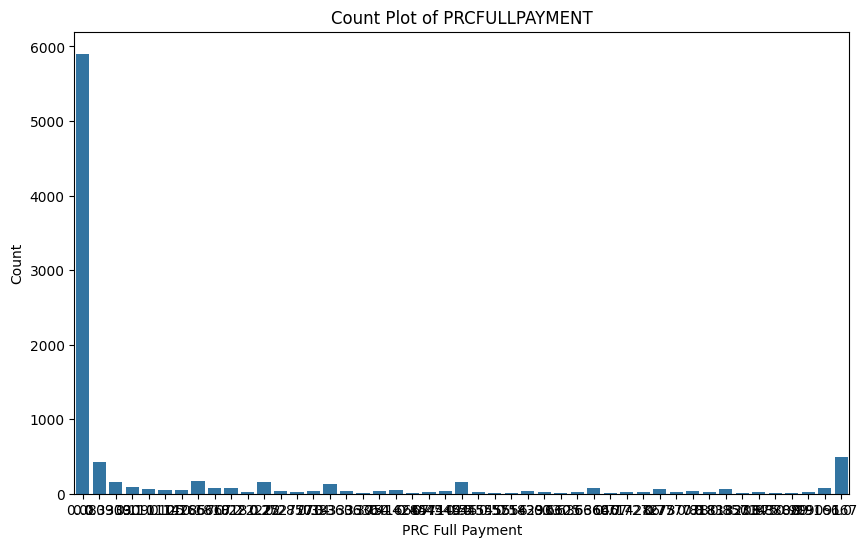

In [11]:
# Univariate Analysis (Categorical Variables - Count Plots)
plt.figure(figsize=(10, 6))
sns.countplot(x='PRC_FULL_PAYMENT', data=credictcardData)
plt.title('Count Plot of PRCFULLPAYMENT')
plt.xlabel('PRC Full Payment')
plt.ylabel('Count')
plt.show()

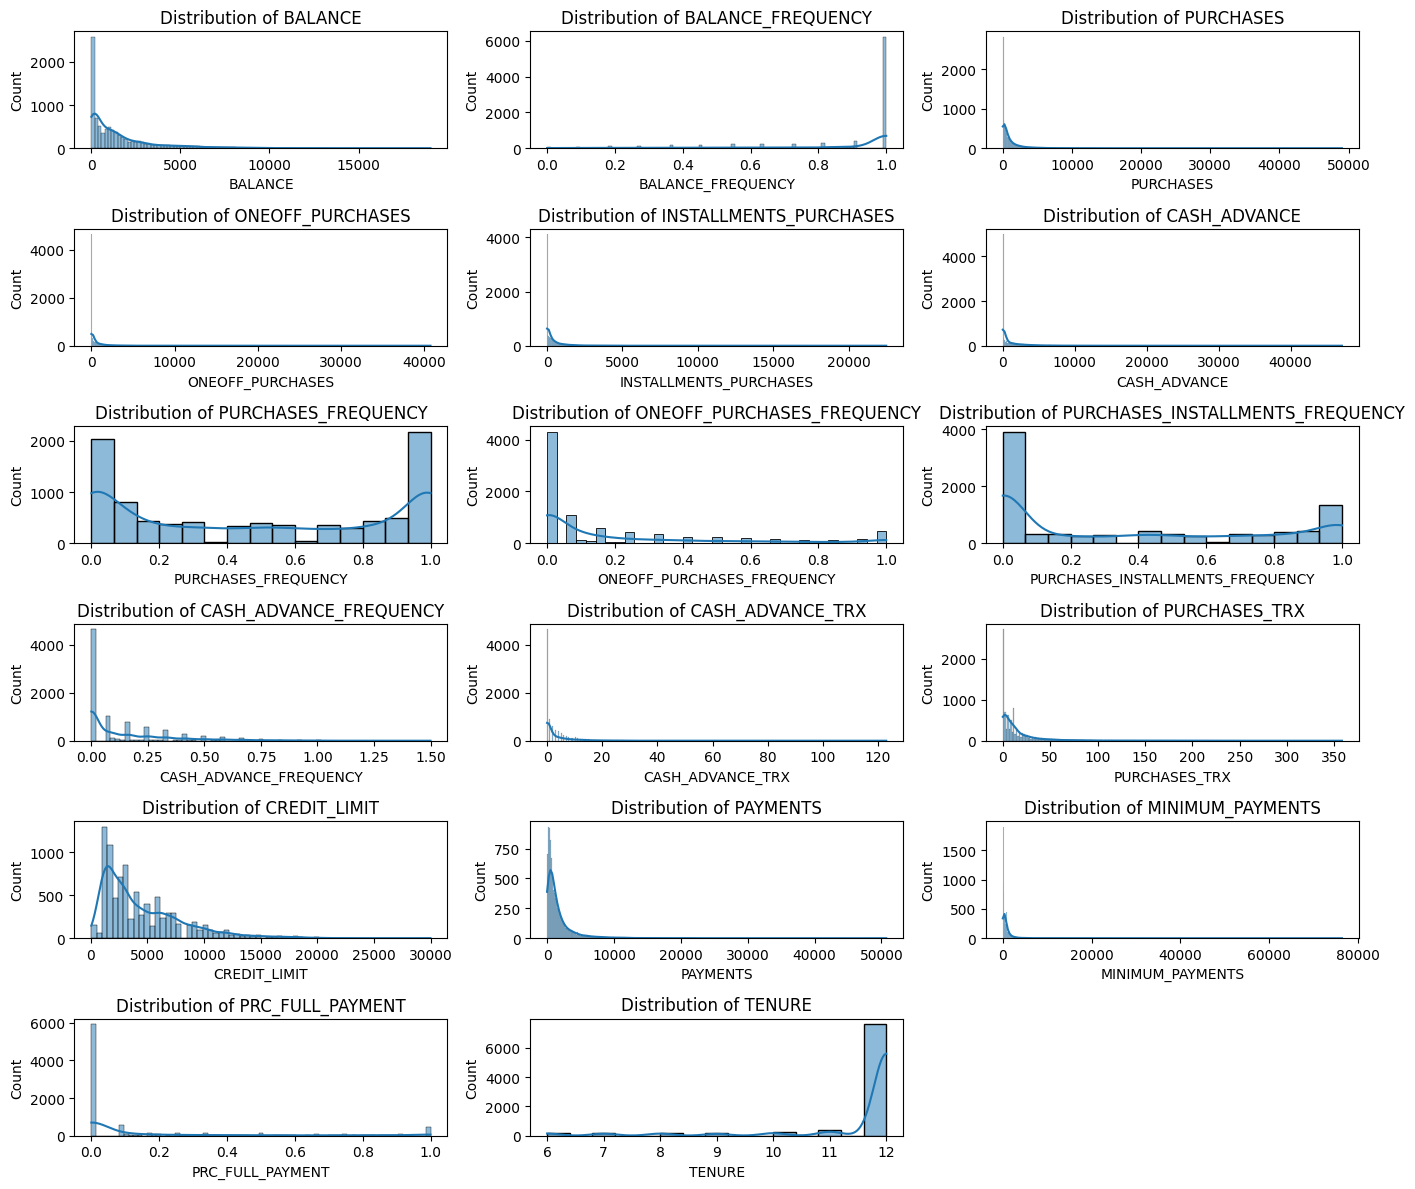

In [12]:
# Plot the distribution of key features
plt.figure(figsize=(14, 12))
for i, column in enumerate(credictcardData.columns[1:], 1):
    plt.subplot(6, 3, i)
    sns.histplot(credictcardData[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

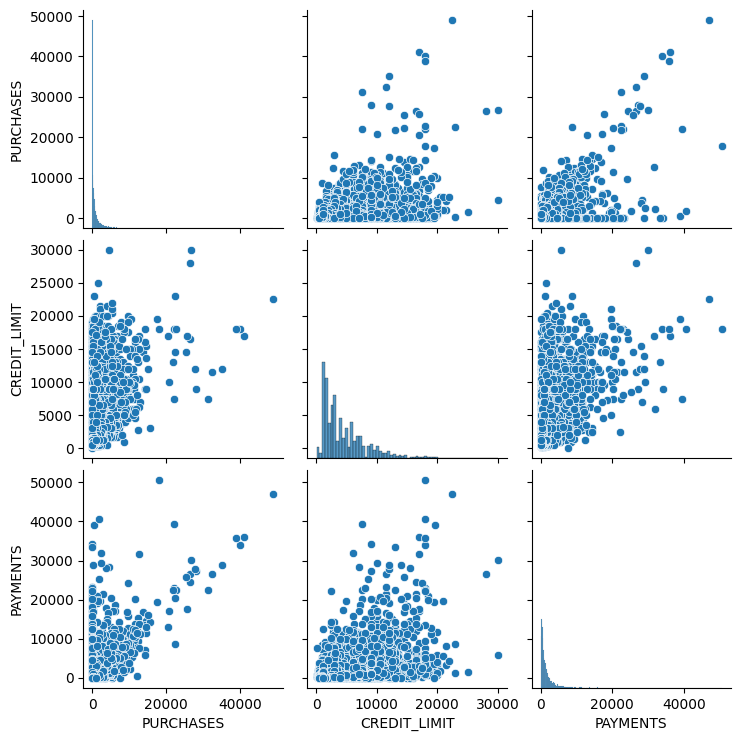

In [13]:
# Bivariate Analysis (Scatter Plot for Numerical Variables)
sns.pairplot(credictcardData[['PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS']])
plt.show()

In [15]:
print(credictcardData.columns)


Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')


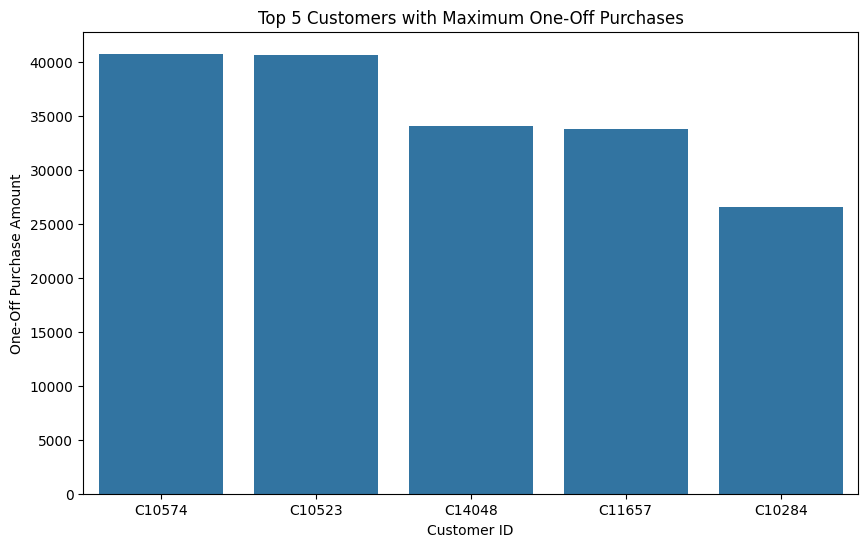

In [17]:
# Find the top 5 customers with the maximum one-off purchases
top5_oneoff_purchase = credictcardData.nlargest(5, 'ONEOFF_PURCHASES')

# print("Top 5 customers with the maximum one-off purchases:")
# print(top5_oneoff_purchase[['CUST_ID', 'ONEOFF_PURCHASES']])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='CUST_ID', y='ONEOFF_PURCHASES', data=top5_oneoff_purchase)
plt.title('Top 5 Customers with Maximum One-Off Purchases')
plt.xlabel('Customer ID')
plt.ylabel('One-Off Purchase Amount')
plt.show()


**Top 5 Customers with the Highest Credit Limits**

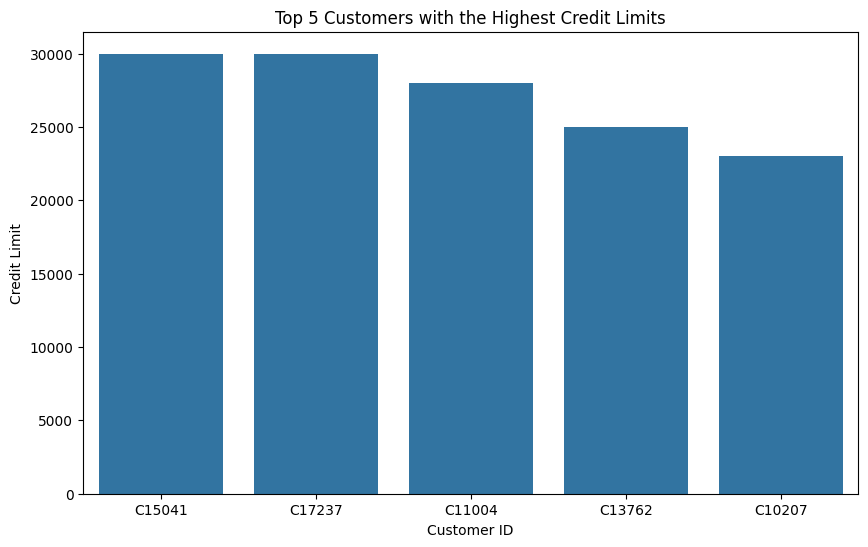

In [18]:
# Find the top 5 customers with the highest credit limits
top5_credit_limit = credictcardData.nlargest(5, 'CREDIT_LIMIT')



# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='CUST_ID', y='CREDIT_LIMIT', data=top5_credit_limit)
plt.title('Top 5 Customers with the Highest Credit Limits')
plt.xlabel('Customer ID')
plt.ylabel('Credit Limit')
plt.show()


**Top 5 Customers Who Frequently Use Cash Advances**

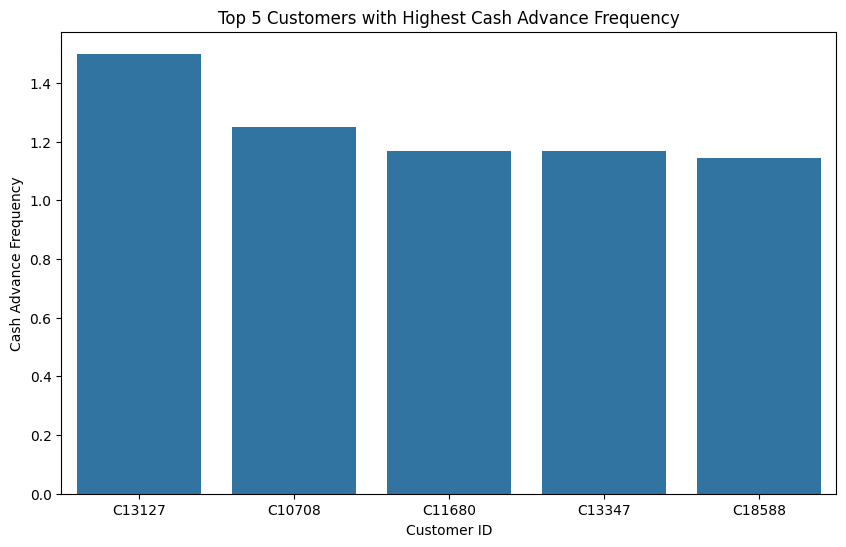

In [19]:
# Find the top 5 customers who frequently use cash advances
top5_cash_advance = credictcardData.nlargest(5, 'CASH_ADVANCE_FREQUENCY')


# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='CUST_ID', y='CASH_ADVANCE_FREQUENCY', data=top5_cash_advance)
plt.title('Top 5 Customers with Highest Cash Advance Frequency')
plt.xlabel('Customer ID')
plt.ylabel('Cash Advance Frequency')
plt.show()


**Top 5 Customers with High Purchase Frequency**

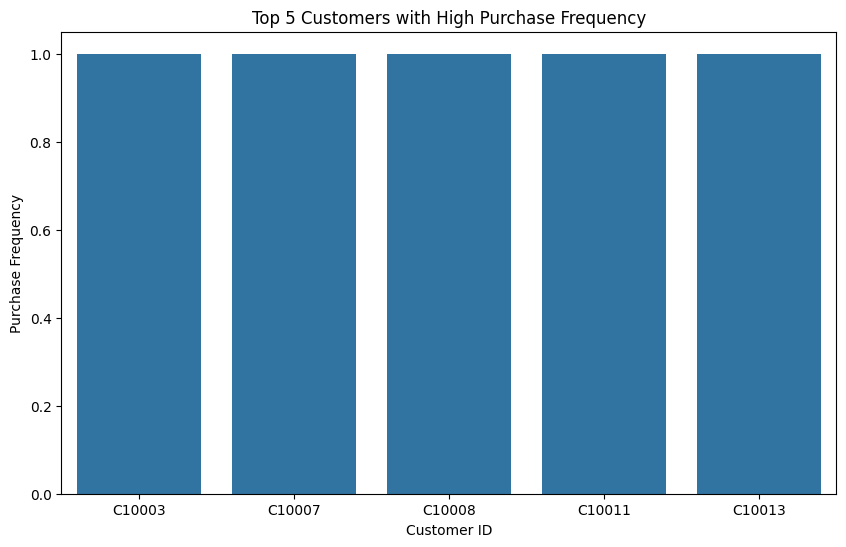

In [20]:
# Find the top 5 customers with high purchase frequency
top5_purchase_frequency = credictcardData.nlargest(5, 'PURCHASES_FREQUENCY')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='CUST_ID', y='PURCHASES_FREQUENCY', data=top5_purchase_frequency)
plt.title('Top 5 Customers with High Purchase Frequency')
plt.xlabel('Customer ID')
plt.ylabel('Purchase Frequency')
plt.show()


**Top 5 Customers with the Most Cash Advance Transactions**

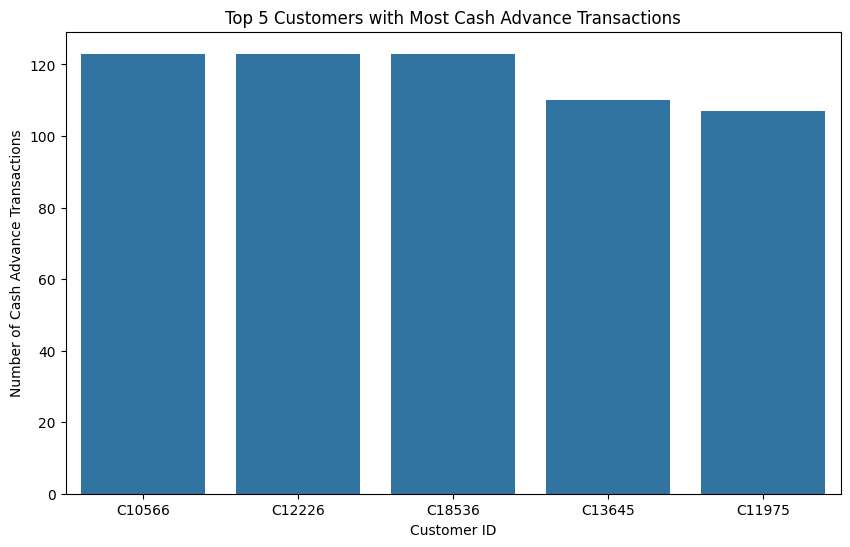

In [21]:
# Find the top 5 customers with the most cash advance transactions
top5_cash_advance_trx = credictcardData.nlargest(5, 'CASH_ADVANCE_TRX')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='CUST_ID', y='CASH_ADVANCE_TRX', data=top5_cash_advance_trx)
plt.title('Top 5 Customers with Most Cash Advance Transactions')
plt.xlabel('Customer ID')
plt.ylabel('Number of Cash Advance Transactions')
plt.show()


In [14]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
corr_matrix = credictcardData.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'C10001'

<Figure size 1000x800 with 0 Axes>

**Top 5 Customers Who Made the Maximum One-Off Purchases**

In [ ]:
# Find the top 5 customers with the maximum one-off purchases
top5_oneoff_purchase = credictcardData.nlargest(5, 'ONEOFF_PURCHASES')
print("Top 5 customers with the maximum one-off purchases:")
print(top5_oneoff_purchase[['CUST_ID', 'ONEOFF_PURCHASES']])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='CUST_ID', y='ONEOFF_PURCHASES', data=top5_oneoff_purchase)
plt.title('Top 5 Customers with Maximum One-Off Purchases')
plt.xlabel('Customer ID')
plt.ylabel('One-Off Purchase Amount')
plt.show()


Top 5 customers with the maximum one-off purchases:


KeyError: "['CUST_ID'] not in index"